<a href="https://colab.research.google.com/github/leoliu5550/colab_for_nn_homework/blob/master/nn_regression_001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 使用Pytorch建立類神經
預測回歸型別

In [19]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt

## 建立資料

In [20]:
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  
# x data (tensor), shape=(100, 1)，一維轉成二維資料
# EG. x=[1,2,3]
y = x.pow(2) + 0.2*torch.rand(x.size())                 
# noisy y data (tensor), shape=(100, 1)

In [21]:
x, y = Variable(x), Variable(y)

In [22]:
%matplotlib inline

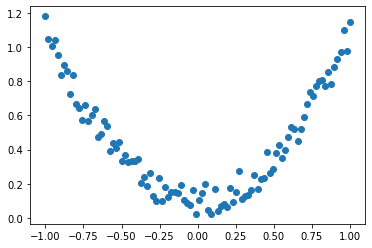

In [23]:
plt.scatter(x.data.numpy(), y.data.numpy())

# 定義 類神經

In [26]:
class Net(torch.nn.Module):
  def __init__(self,n_features,n_hidden,n_output):  #搭建層需要的訊息
    super(Net,self).__init__()
    self.hidden = torch.nn.Linear(n_features,n_hidden)
    self.predict = torch.nn.Linear(n_hidden,n_output)
  def forward(self,x):  #向前傳遞的過程，向目標函數前進
    x = F.relu(self.hidden(x))
    x = self.predict(x)
    return x
    

In [27]:
net = Net(1,10,1)#n_features,n_hidden,n_output

In [28]:
print(net)#類神經結構

Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)


優化器：優化神 優化演算法的功能，是通過改善訓練方式，來最小化(或最大化)損失函式E(x) 

In [30]:
optimizer = torch.optim.SGD(net.parameters(),lr=0.5)
loss_func = torch.nn.MSELoss()#用於回歸問題計算損失函數

# 訓練類神經

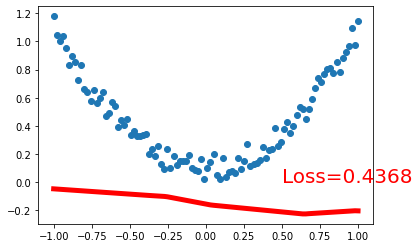

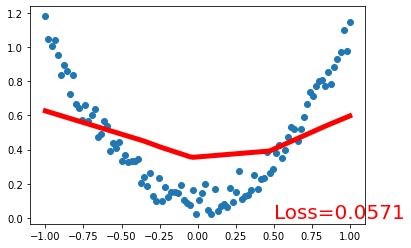

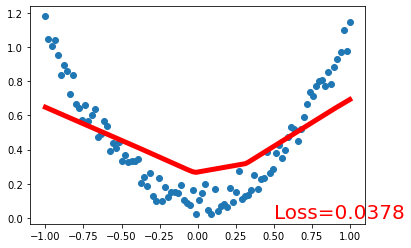

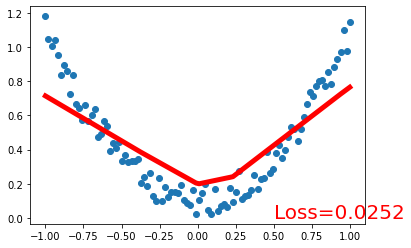

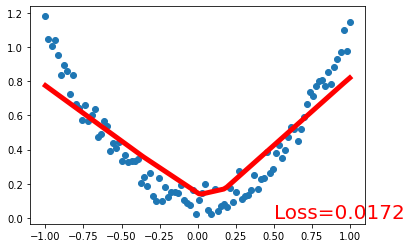

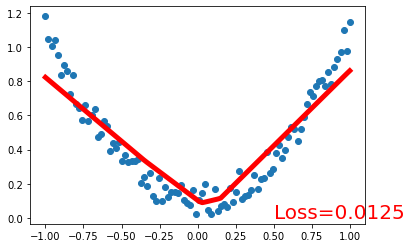

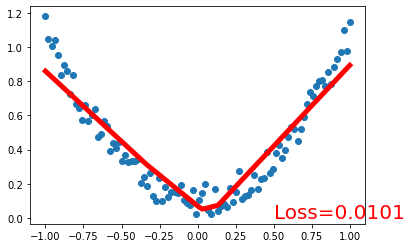

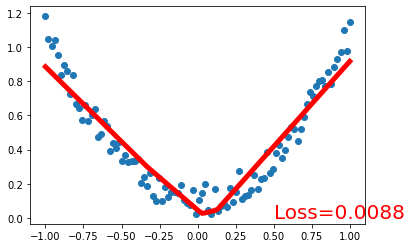

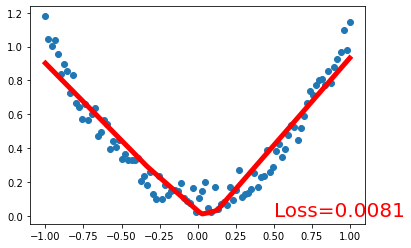

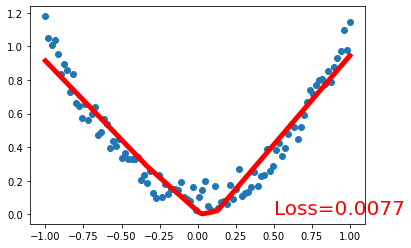

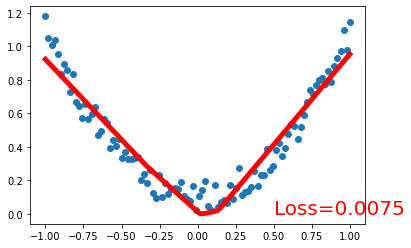

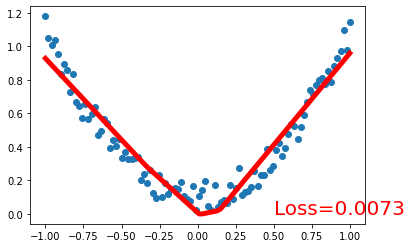

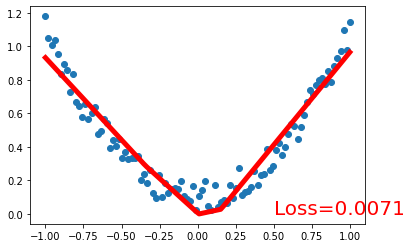

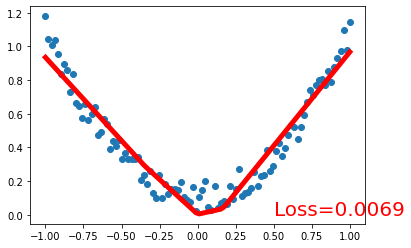

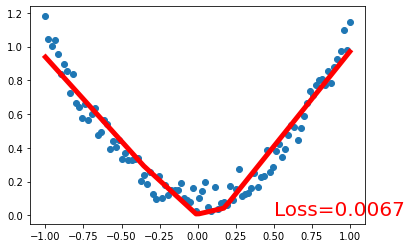

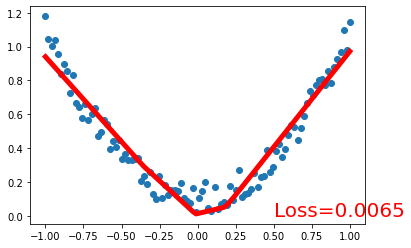

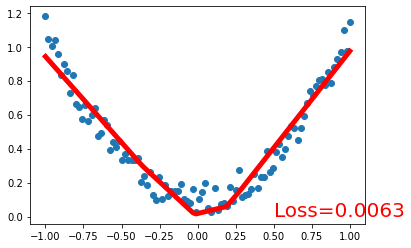

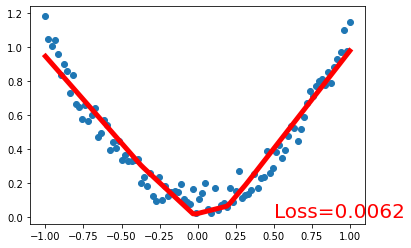

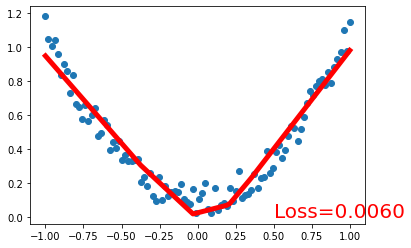

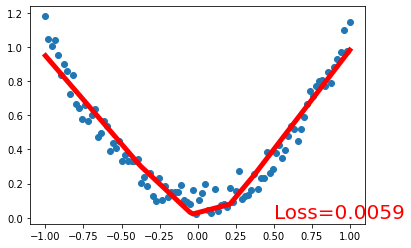

In [31]:
plt.ion()   # something about plotting


for t in range(100):
  prediction = net(x)

  loss = loss_func(prediction,y)

  #優化步驟
  optimizer.zero_grad() #先將所有參數降為零
  loss.backward()     #開始這一次的反向傳遞
  optimizer.step()    #優化梯度


  if t % 5 == 0:
  # plot and show learning process
    plt.cla()
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
    plt.text(0.5, 0, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 20, 'color':  'red'})
    plt.pause(0.1)
plt.ioff()
plt.show()